**Данный проект посвящен** анализу успешности компьютерных игр. Проект выполняется на наборе данных, собранных до 2016 года и содержащих исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель работы:** выявить факторы,которые должны помочь менеджменту компании «Стримчик» в определении потенциально выигрышных в 2017 году продуктов и проектов

**Задачи:**

- **Задача 1.** Подготовка данных (преобразование типов данных, заполнение пропусков, создание доп. столбца с суммарными продажами по регионам)

- **Задача 2.** Исследовательский анализ данных
Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды
Посмотрим, как менялись продажи по платформам. 
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков (диаграммы рассеяния, корреляция)
Выделить наиболее и наименее прибыльные жанры

- **Задача 3.** Составление портрета пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5), их различия в долях продаж.
Самые популярные жанры (топ-5)
Влияние рейтинга ESRB на продажи в отдельном регионе

- **Задача 4.** Проверка статистических гипотез о равенстве средних рейтингов:
Xbox One и PC одинаковые;
жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Изучим данные

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import pandas as pd
import numpy as np
import warnings

In [2]:
#чтобы не выпадали предупреждения
warnings.filterwarnings('ignore')

In [3]:
#подгружаем датасет
data = pd.read_csv('/datasets/games.csv')

In [4]:
#посмиотрим на переменные и их типы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#посмотрим на датасет
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
len(data['Name'].str.lower().unique())

11560

In [7]:
data.shape

(16715, 11)

In [8]:
#изучим платформы, с которыми предстоит работать и их количество
print(data['Platform'].str.lower().unique())
len(data['Platform'].str.lower().unique())

['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']


31

In [9]:
#изучим жанры, с которыми предстоит работать и их количество
print(data['Genre'].str.lower().unique())
len(data['Genre'].str.lower().unique())

['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' nan]


13

<AxesSubplot:>

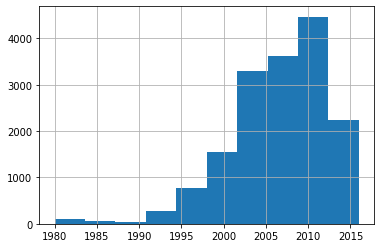

In [10]:
#распределение игр по году релиза
data['Year_of_Release'].hist()

<AxesSubplot:>

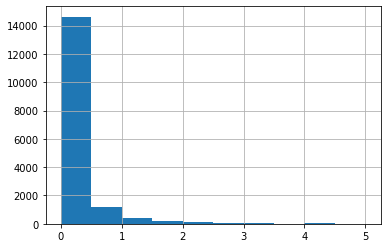

In [11]:
#распределение продаж игр в Северной Америке
data['NA_sales'].hist(range = (0,5))

<AxesSubplot:>

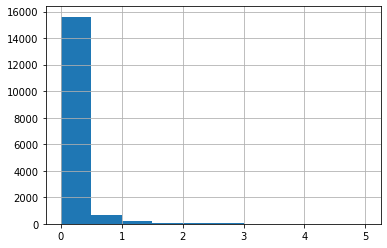

In [12]:
#распределение продаж игр в Европе
data['EU_sales'].hist(range = (0,5))

<AxesSubplot:>

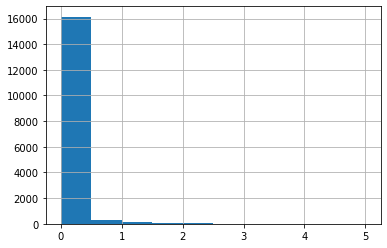

In [13]:
#распределение продаж игр в Японии
data['JP_sales'].hist(range = (0,5))

<AxesSubplot:>

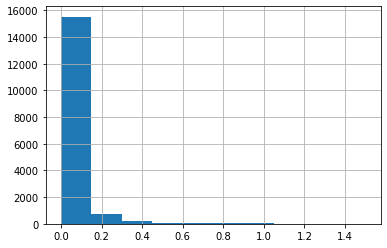

In [14]:
#распределение продаж игр в других регионах
data['Other_sales'].hist(range=(0,1.5))

<AxesSubplot:>

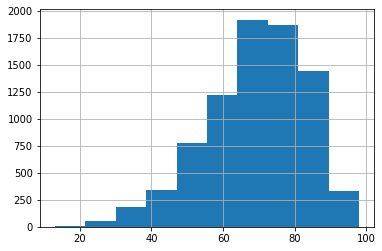

In [15]:
#распределение оценок критиков
data['Critic_Score'].hist()

In [16]:
#распределение оценок пользователей
data['User_Score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

In [17]:
#посмотрим, какие виды рейтингов ESRB представлены в базе
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Мы первично изучили переменные датасета. Можно сказать, что в нем 16715 строк, которые представляют примерно 11560 игр, выпущенных на 31 платформе и в 12 различных жанрах. В данных есть игры, выпущенные в 20 веке, с 1980+, но большая их часть приходится на 21 век (2002-2012). В Северной Америке, Европе и Японии продожи игр в основном не превышают полумиллиона проданных копий.

### Подготовка данных к анализу

In [18]:
# Замените названия столбцов (приведите к нижнему регистру)
data = data.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_released',
                      'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                      'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score',
                      'Rating':'rating'})

In [19]:
#проверим успешность преобразования
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           16713 non-null  object 
 1   platform       16715 non-null  object 
 2   year_released  16446 non-null  float64
 3   genre          16713 non-null  object 
 4   na_sales       16715 non-null  float64
 5   eu_sales       16715 non-null  float64
 6   jp_sales       16715 non-null  float64
 7   other_sales    16715 non-null  float64
 8   critic_score   8137 non-null   float64
 9   user_score     10014 non-null  object 
 10  rating         9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [20]:
#user_score (object->int)
data['user_score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.5       2
1.1       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Видим, что в столбце с оценкой пользователей большинство значений пропуски, на втором месте аббревиатура tbd. Посмотрим, что это за игры.

In [21]:
data[data['user_score']=='tbd']

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Попробуем сравнить числовые показатели других переменных для игр, у которых рейтинг пользователей 

In [22]:
display(data[data['user_score']!='tbd'].describe())
data[data['user_score']=='tbd'].describe()

,year_released,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,14070.000000,14291.000000,14291.000000,14291.000000,14291.000000,7055.000000
mean,2006.321535,0.286670,0.162283,0.090320,0.052681,70.233877
std,6.175711,0.874623,0.540532,0.332179,0.200815,13.885728
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,62.000000
50%,2007.000000,0.080000,0.030000,0.000000,0.010000,72.000000
75%,2011.000000,0.260000,0.130000,0.050000,0.040000,80.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,year_released,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000
mean,2007.450337,0.126052,0.043519,0.002727,0.015862,60.711645
std,3.484229,0.180586,0.111412,0.026136,0.039156,11.193035
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.075000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


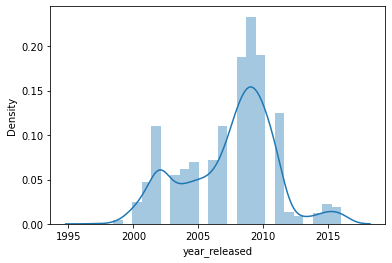

In [23]:
sns.distplot(data[data['user_score']=='tbd']['year_released'].dropna(), hist=True);

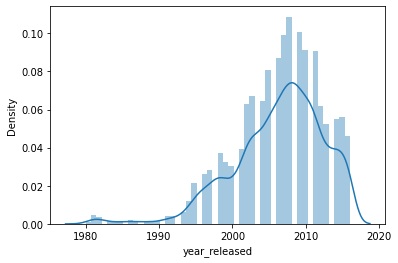

In [24]:
sns.distplot(data[data['user_score']!='tbd']['year_released'].dropna(), hist=True);

Игры с пользовательским рейтингом tbd встречаются на всем протяжении наблюдения, как и другие значения пользовательского рейтинга

Кажется, что из имеющихся количественных данных tbd восстановить не удастся

Возможно удастся понять больше о tbd, рассмотрев другую переменную рейтинга - rating

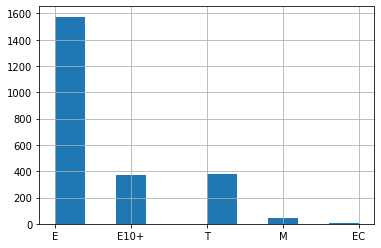

In [25]:
data[data['user_score']=='tbd']['rating'].hist();

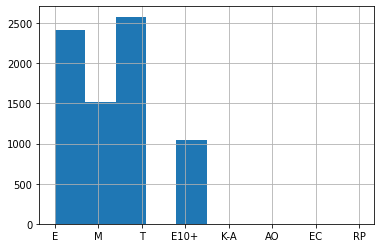

In [26]:
data[data['user_score']!='tbd']['rating'].hist();

Рейтинг от организации ESRB распределен по разному для пользовательских оценок tbd и не tbd, одако природу tbd это не проясняет.

Опираясь на имеющиеся данные, понять значение tbd не удалось, поэтому пришлось прибегнуть к дополнительной информации в интернете. Согласно сайту [FB.ru](https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie) tbd в мире геймина означает "To Be Determined", то есть, по сути, отсутствие рейтинга, значит значения tbd могут быть заменены на пропуски

In [27]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [28]:
data['user_score'] = data['user_score'].astype('float')

Изучим пропуски в данных

In [29]:
data.isna().sum()

name                2
platform            0
year_released     269
genre               2
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score     8578
user_score       9125
rating           6766
dtype: int64

Предположения о природе происхождения пропусков:

- пропуски в именах, жанрах, годах выпуска и рейтингах могут быть связаны с тем, что игра вышла очень давно, например в 80-е или 90-е и данные о ней не сохранились. Или же, если данные собирались при помощи парсинга разных источников, причиной пропусков могла стать техническая ошибка при самом парсинге или совмещении данных парсинга разных источников.

- рейтинг (rating) может быть не указан, когда игра не имеет ограничений, то есть подходит для любой возрастной категории.

- critic_score может иметь пропуски, потому что какие-то игры в принципе не направляются на оценку критиков или, наоборот, сейчас ожидают оценку критиков.

- user_score может иметь пропуски потому, что пользователи имеют выбор ставить оценку или нет, и какие-то игры могут остаться без оценки, или эти игры сейчас ожидают оценку критиков

In [30]:
data[data['name'].isna()]

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски по name и genre характерны для двух игр, удалим их

In [31]:
data = data[~data['name'].isna()]

In [32]:
#Посмотрим на пропуски по году выпуска
data[data['year_released'].isna()]

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Год выпуска участвует в анализе, поэтому важно восстановить данные по максимуму. Видим, что в названии игр часто встречается год их выпуска. Есть погрешность в 1 год в некоторых случаях. Например, FIFA Soccer 2004 вышла в 2003, так как FIFA анонсирует игры в начале футбольного сезона (осенью), основная часть которого пройдет уже после нового года. А для игры PDC World Championship Darts 2008 такой разницы не будет, она вышла в 2008. Погрешность в 1 год будем считать допустимой, поэтому восстановим год выхода игры из ее названия 

In [33]:
data.shape

(16713, 11)

In [34]:
data = data[~data['year_released'].isna()]

In [35]:
data.shape

(16444, 11)

Заполним пропуски по переменной rating модальным значением - "Е". Во-первых, оно самое часто встречающееся. Во-вторых, "Е" означает Everyone, то есть отсутствие ограничений. Мы предполагаем, что для тех игр, у которых нет ограничений по аудитории могут не ставить "Е", потому что ограничений и так нет.

In [36]:
data[data['rating'].isna()].head(20)

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [37]:
data['rating'] = data['rating'].fillna('unknown')

In [38]:
# Cуммарные продажи во всех регионах и запишите их в отдельный столбец
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [39]:
#полных дубюликатов у нас нет
data.duplicated().sum()

0

In [40]:
data[data['name'].str.lower().duplicated()].head(10)

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,unknown,10.30
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39


Видим, что есть дубликаты по названиям игр, когда одна и та же игра выпускалась на разных платформах. Поищем явные дубликаты по столбцам name и platform

In [41]:
#пример
data[data['name']=='Grand Theft Auto V']

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [42]:
#дубликатов по связке платформа-название игры нет
data[data.duplicated(subset = ['name', 'platform'])]

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


Дубликаты удалены не были, поскольку дубликатов имя-платформа нет: важно сохранить данные о платформах, на которых была выпущена каждая игра (во-первых, рассматривая продажи игры на одной платформе мы не учитываем выручку игры со всех остальных платформ, во-вторых, если оставлять какую-то одну платформу для каждой игры, то без экспертов или специфической задачи, с описанным условием, мы не можем выбрать одну конкретную платформу)

### Исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [43]:
data_y = data.sort_values(by = 'year_released').drop_duplicates(subset='name', keep = 'first')

In [44]:
data_y.shape

(11426, 12)

In [45]:
data_y.head(10)

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,unknown,1.15
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,unknown,2.76
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,unknown,1.05
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,unknown,0.27
5360,Freeway,2600,1980.0,Action,0.32,0.02,0.0,0.00,NaN,NaN,unknown,0.34
262,Asteroids,2600,1980.0,Shooter,4.00,0.26,0.0,0.05,NaN,NaN,unknown,4.31
4019,Ice Hockey,2600,1980.0,Sports,0.46,0.03,0.0,0.01,NaN,NaN,unknown,0.50
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,unknown,0.23
2650,Boxing,2600,1980.0,Fighting,0.72,0.04,0.0,0.01,NaN,NaN,unknown,0.77
3394,BurgerTime,2600,1981.0,Puzzle,0.55,0.03,0.0,0.01,NaN,NaN,unknown,0.59


In [46]:
#распределение выпущенных впервые игр по годам
data_y['year_released'].describe()

count    11426.000000
mean      2005.658848
std          6.161291
min       1980.000000
25%       2002.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_released, dtype: float64

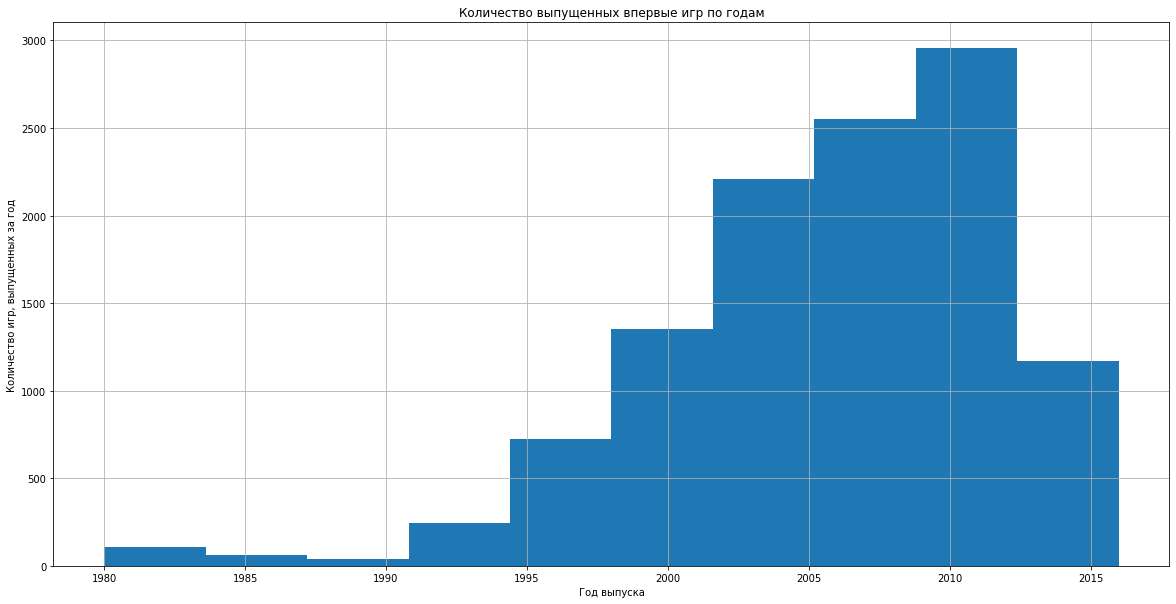

In [47]:
#количество выпущенных впервые игр по годам
data_y['year_released'].hist(figsize=[20, 10])
plt.title('Количество выпущенных впервые игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, выпущенных за год');

Данные до 90х годов не совсем репрезентативны (n<30 во многих случаях), поэтому эти годы важны скорее для понимания того, какая была динамика выпуска игр на начальном этапе, кто выпускал игры первым и какие это были игры. Важно, что до 2002 года было выпущено менее 25% всех игр, поэтому далее нас будут интересовать игры, выпущенные после 2002

С начала 90х до начала 2010х количество игр, которые выпускаются впервые начинает регулярно прирастать: примерно каждые 3 года есть скачок, при котором количество проданных копий игр увеличивается

С 2012 по 2015 наблюдается спад в количестве выпущенных впервые игр. Возможно, к этомку моменту на рынке закрепились платформы- лидеры и игры лидеры,существование которых задает большую конкуренцию для выпуска новых игр, поэтому новых игр выходит меньше.

#### Посмотрите, как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?


In [48]:
#top 10 платформ с наибольшими суммарными продажами
top_platforms = data.groupby(by = 'platform')['all_sales'].sum().sort_values(ascending=False).head(10).index.tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

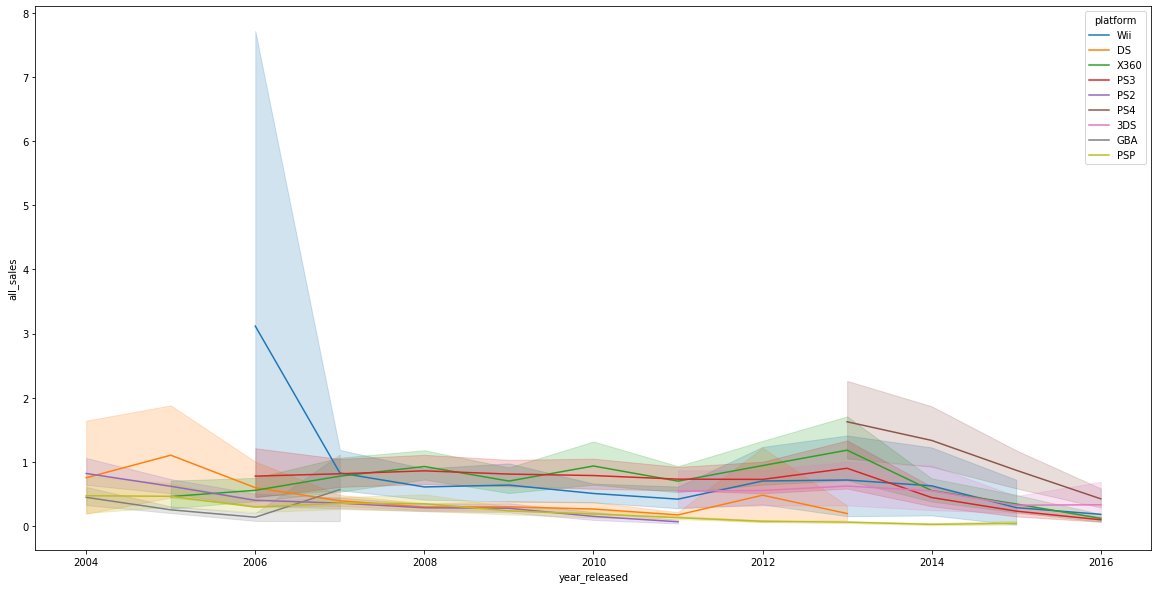

In [49]:
#Распределение изменения продаж на разных платформах по годам
plt.figure(figsize=(20,10))
sns.lineplot(x= 'year_released', y="all_sales",
             hue="platform",
             data=data[(data['platform'].isin(top_platforms)&(data['year_released']>2003))]);


In [50]:
top_platforms = data.loc[(data['platform'].isin(top_platforms))&(data['year_released']>2003), :]
top_platforms.head()

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


<AxesSubplot:xlabel='year_released', ylabel='all_sales'>

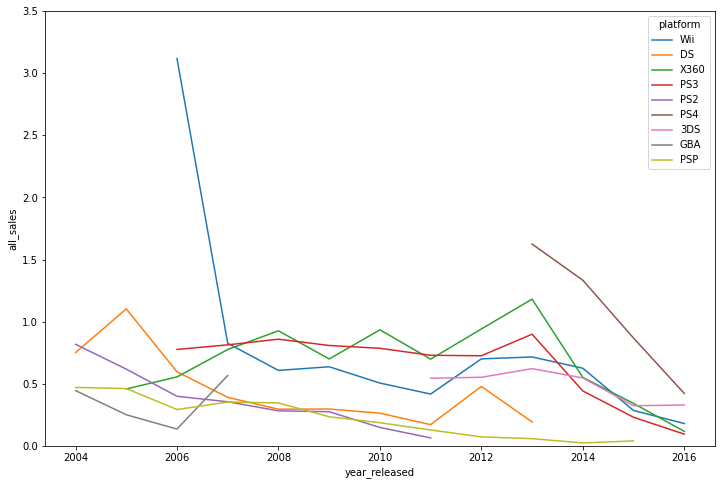

In [51]:
#Распределение изменения продаж на разных платформах по годам
plt.figure(figsize=(12,8))
plt.ylim(top=3.5)
sns.lineplot(x= top_platforms['year_released'], 
             y = top_platforms['all_sales'],
             hue= top_platforms['platform'],
            ci = None)

In [52]:
#сгруппируем данные по платформам и найдем минимальный и максимальный год релиза для каждой из платформ
platforms_life = data.groupby(by = 'platform')['year_released'].agg(['min', 'max'])
platforms_life.columns = ['first_y', 'last_y']
#сделаем отдельный столбец с количеством лет существования платформ
platforms_life['life_exp'] = platforms_life['last_y']-platforms_life['first_y']
#выведем платформы-долгожители
platforms_life.sort_values(by = 'life_exp', ascending = False).head()

,first_y,last_y,life_exp
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0


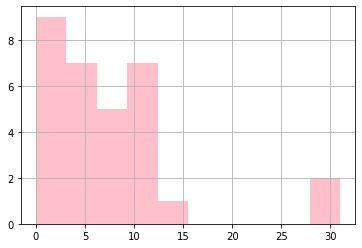

In [53]:
platforms_life['life_exp'].hist(color = 'pink');

Видим, что жизненный цикл платформ распределен неоднородно, поэтому делать выводы о характерном сроке исчезновенпя платформ можно по медиане

In [54]:
platforms_life['life_exp'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: life_exp, dtype: float64

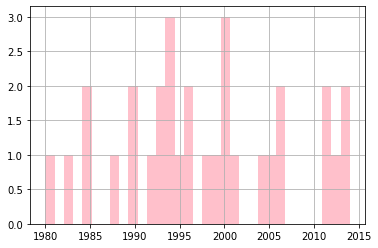

In [55]:
#распределение количества платформ, выпущенных впервые по годам
platforms_life['first_y'].hist(bins = 33, range = (1980, 2014), color = 'pink');

In [56]:
platforms_life['first_y'].describe()

count      31.000000
mean     1997.645161
std         9.094131
min      1980.000000
25%      1992.500000
50%      1996.000000
75%      2004.500000
max      2013.000000
Name: first_y, dtype: float64

Выводы:
- С 2013 по 2016 новые платформы не появлялись, согласно имеющимся данным. 
- Судя по графику, возникают пики, когда за год появляются 1 и более новые платформы и это происходит 2-3 года подряд, а затем идет спад на 2-3 года, когда новые платформы не возникают
- В среднем платформы существуют около 6 лет, но на рынке есть лидеры по продолжительности существования - PC, DS (существуют около 30 лет).

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Итак, средний цикл жизни платформы - 6 лет, получается, чтобы прогнозировать данные 2017 года, стоит сфокусироваться на играх, вышедших после 2010 года. Отберем такие игры в отдельную таблицу и далее будем работать с ней

In [57]:
df = data[data['year_released'].isin(range(2014,2017))]

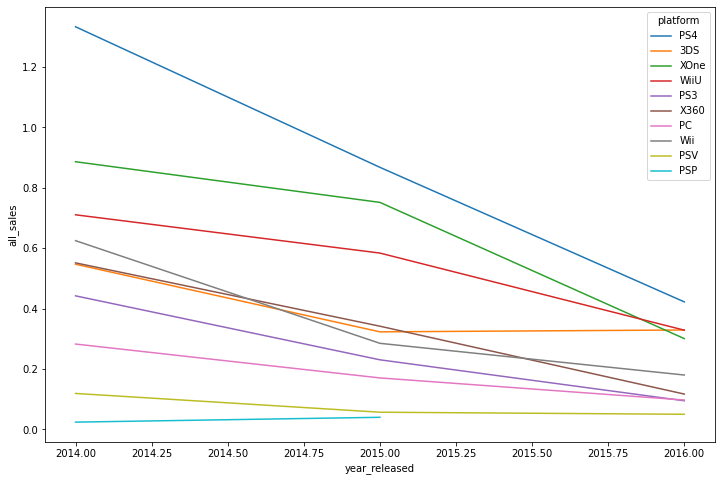

In [58]:
plt.figure(figsize=(12,8))
sns.lineplot(x= 'year_released', y="all_sales",
             hue="platform", 
             data=df,
            ci = None);

- Сейчас есть 9 платформ, которые продолжают выпускать игры. 
- По количеству проданных копий лидирует PS4, на втором месте XOne и WiiU, но продажи на этих трех платформах последние три года снижаются.
- С 2015 года рост наблюдается у платформы 3DS
- PSV имеет наиболее низкое количество проданных копий, которое не менялось с 2015
- Потенциально прибыльные - PS4, XOne и WiiU, ппоскольку эти платформы сейчас на пике популярности и уже имеют большую аудиторию.При этом, 3DS кажется наибольее потенциально прибыльной, поскольку тренд на возрастание ее популярности только начался

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

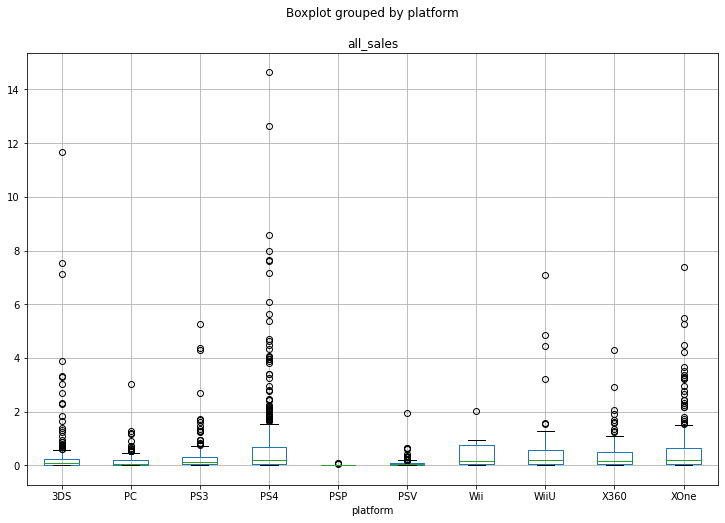

In [59]:
#Строим ящики с усами
df.boxplot(column = 'all_sales', by= 'platform', figsize = (12,8));

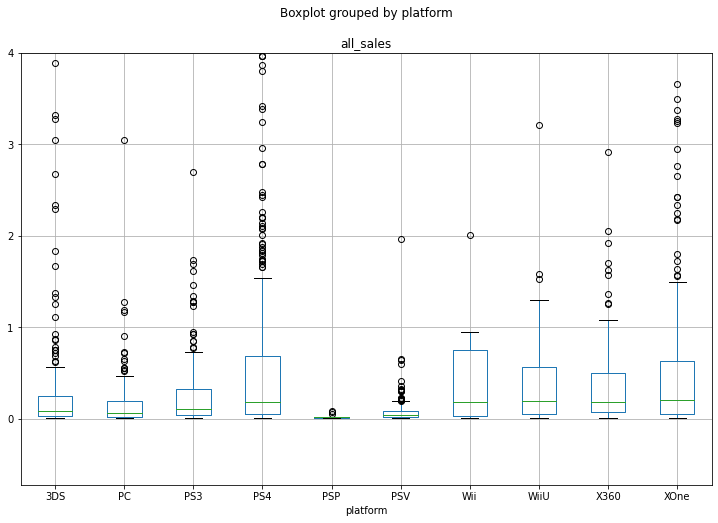

In [60]:
#построила с лимитом, но в целом и по прошлому графику можно делать выводы
df.boxplot(column = 'all_sales', by= 'platform', figsize = (12,8));
plt.ylim(top = 4);

- Наиболее продаваемые игры выпускаются на платформах-лидерах PS4, X360 и XOne
- У PS4 и XOne наибольший потенциал в плане продаж, поскольку ящики с усами вытянутые и максимальные значения продаж самые высокие среди платформ
- Большинство платформ продают менее 1 миллиона копий игр, продажи на платформах PS4, WiiU, X360 и XOne обычно преодолевают цифру в  в 1 миллион проданных копий

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве платформы для анализа я выбрала PS3

In [61]:
PS3 = df[df['platform']=='PS3']

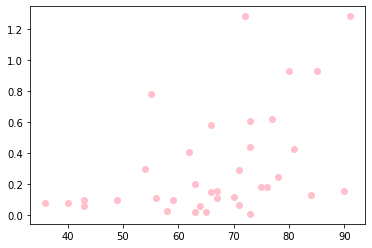

In [62]:
#Продажи игр и оценки критиков
plt.scatter(data = PS3, y = 'all_sales', x = 'critic_score', c = 'pink')

In [63]:
PS3['all_sales'].corr(PS3['critic_score'])

0.44657460493190704

Связи между продажами игр и оценками критиков нет визуально. Математически есть слабая положительная линейная связь

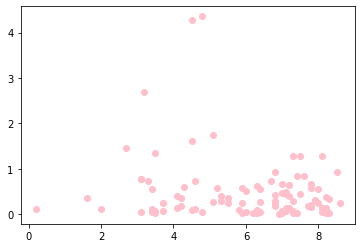

In [64]:
#Продажи игр и оценки пользователей
plt.scatter(data = PS3, y = 'all_sales', x = 'user_score', c = 'pink')

In [65]:
#оценим корреляцию продаж и рейтинга пользоватедй для PS3
PS3['all_sales'].corr(PS3['user_score'])

-0.16676141347662116

Связи между продажами игр и оценками критиков пользователей нет ни визуально, ни математически

#### Соотнесите выводы с продажами игр на других платформах.

Построим график рассеяния для всех игр

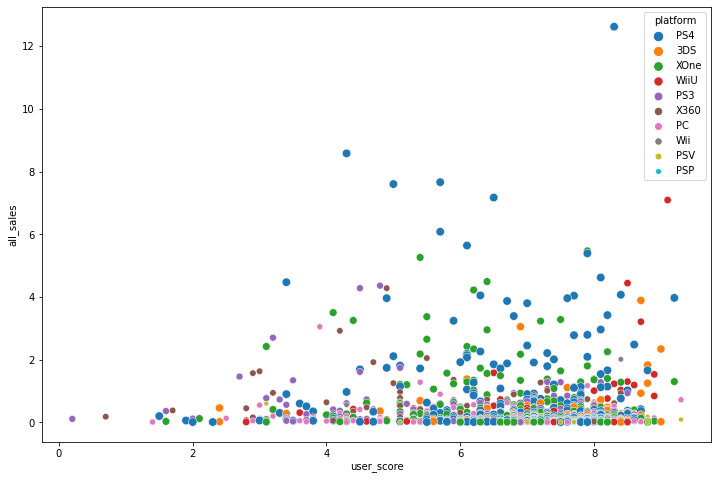

In [66]:
#общие продажи и рейтинг пользователей
plt.figure(figsize=(12,8))
sns.scatterplot(x="user_score", y="all_sales", hue="platform",size = "platform",
              data=df, legend='full');

Ситуация для всех платформ по соотношению рейтинга от пользователей и продаж примерно одинаковая

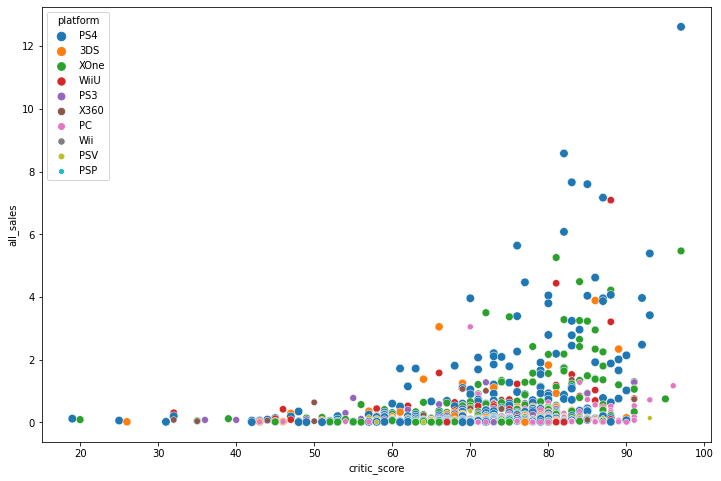

In [67]:
#общие продажи и рейтинг критиков
plt.figure(figsize=(12,8))
sns.scatterplot(x="critic_score", y="all_sales", hue="platform",size = "platform",
              data=df, legend='full');

Ситуация для всех платформ по соотношению рейтинга от критиков и продаж примерно одинаковая, проверим это математически

In [68]:
#корреляция продаж и рейтинга пользователей для всех платформ
df.groupby(by = 'platform')[['all_sales', 'user_score']].corr()

all_sales  user_score
platform                                  
3DS      all_sales    1.000000    0.215193
         user_score   0.215193    1.000000
PC       all_sales    1.000000   -0.071597
         user_score  -0.071597    1.000000
PS3      all_sales    1.000000   -0.166761
         user_score  -0.166761    1.000000
PS4      all_sales    1.000000   -0.040132
         user_score  -0.040132    1.000000
PSP      all_sales    1.000000         NaN
         user_score        NaN         NaN
PSV      all_sales    1.000000   -0.168455
         user_score  -0.168455    1.000000
Wii      all_sales    1.000000    1.000000
         user_score   1.000000    1.000000
WiiU     all_sales    1.000000    0.407926
         user_score   0.407926    1.000000
X360     all_sales    1.000000   -0.138445
         user_score  -0.138445    1.000000
XOne     all_sales    1.000000   -0.070384
         user_score  -0.070384    1.000000

In [69]:
#для Wii r-Пирсона равный 1 объясняется отсутствием данных по user_score (только 2 значения проставлены)
#делать выводы о связи  рейтинга от пользователй и продаж на данной платформе нельзя
df[df['platform']=='Wii']

,name,platform,year_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
850,Just Dance 2015,Wii,2014.0,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
2179,Just Dance 2016,Wii,2015.0,Misc,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
2180,Skylanders: Trap Team,Wii,2014.0,Action,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
3611,FIFA 15,Wii,2014.0,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
7991,How to Train Your Dragon 2,Wii,2014.0,Adventure,0.04,0.13,0.0,0.01,NaN,NaN,E10+,0.18
8009,Just Dance 2017,Wii,2016.0,Misc,0.06,0.11,0.0,0.01,NaN,NaN,E10+,0.18
8941,Skylanders: SuperChargers,Wii,2015.0,Action,0.02,0.12,0.0,0.01,NaN,NaN,unknown,0.15
13570,Disney Planes Fire & Rescue,Wii,2014.0,Action,0.00,0.04,0.0,0.00,NaN,NaN,unknown,0.04
14682,Barbie and Her Sisters Puppy Rescue,Wii,2015.0,Action,0.00,0.03,0.0,0.00,NaN,NaN,E,0.03
16144,Penguins of Madagascar,Wii,2014.0,Action,0.00,0.01,0.0,0.00,NaN,NaN,E,0.01


Наиболее значительную корреляцию показывает платформа WiiU, корреляция пользовательских оценок и продаж здесь составила 0.41. Для остальных платформ даже о слабой связи говорить сложно

In [70]:
#корреляция продаж и рейтинга критиков для всех платформ
df.groupby(by = 'platform')[['all_sales', 'critic_score']].corr()

all_sales  critic_score
platform                                      
3DS      all_sales      1.000000      0.314117
         critic_score   0.314117      1.000000
PC       all_sales      1.000000      0.174634
         critic_score   0.174634      1.000000
PS3      all_sales      1.000000      0.446575
         critic_score   0.446575      1.000000
PS4      all_sales      1.000000      0.402661
         critic_score   0.402661      1.000000
PSP      all_sales      1.000000           NaN
         critic_score        NaN           NaN
PSV      all_sales      1.000000      0.042665
         critic_score   0.042665      1.000000
Wii      all_sales      1.000000           NaN
         critic_score        NaN           NaN
WiiU     all_sales      1.000000      0.370201
         critic_score   0.370201      1.000000
X360     all_sales      1.000000      0.525723
         critic_score   0.525723      1.000000
XOne     all_sales      1.000000      0.428677
         critic_score   0.428677      1.000000

**Вывод:** 
- рейтинг пользователей скорее не связан с продажами, есть слабая положительная связь (r-Пирсона = 0.4) только для платформы WiiU. Для остальных платформ связь значительно слабее.
- рейтинг критиков слабо положительно связан с продажами игр, выпущенных на всех платформах PS3, PS4, WiiU, X360,XOne.  Наибольшая связь рейтинга критиков и продаж наблюдается для платформы X360. Это линейная положительная связь (r-Пирсона = 0.53)

#### Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? 
Выделяются ли жанры с высокими и низкими продажами?

<Figure size 864x576 with 0 Axes>

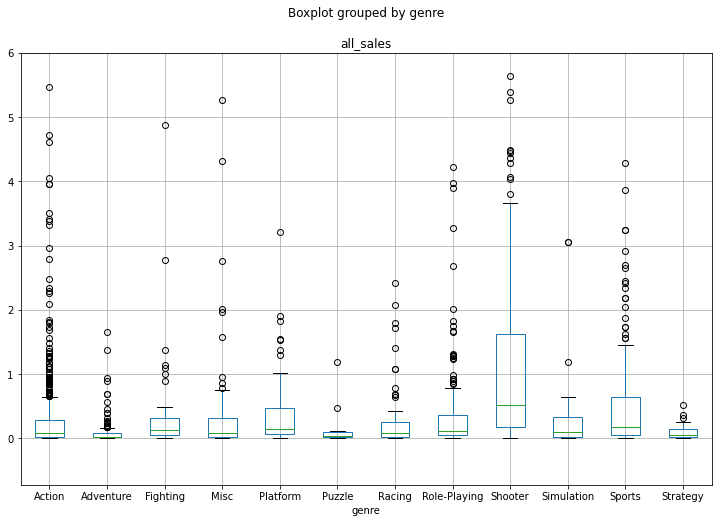

In [71]:
#ящики с усами для всех проданных копий игр по жанрам
plt.figure(figsize=(12,8));
df.boxplot(column = 'all_sales', by= 'genre', figsize = (12,8));
plt.ylim(top = 6);

Визуально шутеры и платформенные игры выделяются по проданным копиям игр

In [72]:
#межквартильный размах и положение медианы на ящиках выше сложно оценить из-за большого количества выбросов, 
#поэтому выведем математическое описание продаж по жанрам
df.groupby(by = 'genre')['all_sales'].agg(['median','mean']).sort_values(by = 'mean', ascending = False)

,median,mean
genre,,
Shooter,0.515,1.335469
Sports,0.180,0.680000
Platform,0.140,0.476053
Fighting,0.125,0.470333
Role-Playing,0.110,0.459005
Racing,0.090,0.398841
Misc,0.090,0.332301
Action,0.090,0.322068
Simulation,0.100,0.298409


In [73]:
#для оценки распределения средних общих продаж по жанрам выведем квартили и медиану
df.groupby(by = 'genre')['all_sales'].agg('mean').describe()

count    12.000000
mean      0.427686
std       0.332630
min       0.094865
25%       0.263271
50%       0.365571
75%       0.471763
max       1.335469
Name: all_sales, dtype: float64

- Самые прибыльные жанры - шутеры (средние продажи 1.3 млн. копий), платформенные игры (средние продажи 476 тыс. копий) и спортивные игры (редние продажи 680 тысю копий)

- Наименее прибыльные жанры - Strategy (средние продажи 107 тыс. копий), Puzzle (редние продажи 157 тыс. копий) и Adventure (средние продажи 94 тыс. копий)

- В 25% случаев средние продажи игр для жанра не превышают 263 тыс. копий
- В 50% случаев средние продажи игр для жанра не превышают 365 тыс. копий
- В 75% случаев средние продажи игр для жанра не превышают 471 тыс. копий

- Стоит обратить внимание на то, что топ-5 игр по средним и медианным продажам различаются. Это связано с большим количеством выбросов в данных, к которым среднее чувствительно. Однако для описания результатаов я использую средние значения, поскольку выбросов много и они показывают потенциал игр, а также отличие ТОПа и анти-ТОПа жанров по медианам и средним различаются незначительно.


### Портреты пользователей по регионам

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Портрет пользователя из Северной Америки


In [74]:
#Топ-5 популярных платформ среди жителей Северной Америки
(
    df.groupby(by = 'platform')['na_sales'].agg(total_sales = ('sum'))
    .sort_values(by = 'total_sales', ascending = False).head(5)
)

,total_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [75]:
#Топ-5 популярных жанров среди жителей Северной Америки
(
    df.groupby(by = 'genre')['na_sales'].agg(total_sales = ('sum'))
    .sort_values(by = 'total_sales', ascending = False).head(5)
)

,total_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [76]:
#посмотрим на связь продаж и категории ESRB в Северной Америке
df.groupby(by = 'rating')['na_sales'].sum().sort_values(ascending = False)

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

Пользователи в Северной Америке предпочитают игры, выпущенные на  на X360,PS3,3DS, PS4 и XOne, жанры Action, Shooter, Sport, Misc и Role-Playing, самая продаваемая возрастная категория в этом регионе M - Mature 17+

#### Портрет пользователя из Европы

In [94]:
#Топ-5 популярных платформ среди жителей Европы
(
    df.groupby(by = 'platform')['eu_sales'].agg(total_sales = ('sum'))
    .sort_values(by = 'total_sales', ascending = False).head(5)
)

,total_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [92]:
#Топ-5 популярных жанров среди жителей Европы
(
    df.groupby(by = 'genre')['eu_sales'].agg(total_sales = ('sum'))
    .sort_values(by = 'total_sales', ascending = False).head(5)
)

,total_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [79]:
#посмотрим на связь продаж и категории ESRB в Европе
df.groupby(by = 'rating')['eu_sales'].sum().sort_values(ascending = False)

rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

Пользователи в Европе предпочитают игры, выпущенные на XOne,PS3,PS4,PC и 3DS, жанры Action, Shooter, Sport, Role-Playing и Racing, самая продаваемая возрастная категория в этом регионе M - mature 17+

#### Портрет пользователя из Японии¶

In [80]:
#Топ-5 популярных платформ среди жителей Японии
(
    df.groupby(by = 'platform')['jp_sales'].agg(total_sales = ('sum'))
    .sort_values(by = 'total_sales', ascending = False).head(5)
)

,total_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [81]:
#Топ-5 популярных жанров среди жителей Японии
(
    df.groupby(by = 'genre')['jp_sales'].agg(total_sales = ('sum'))
    .sort_values(by = 'total_sales', ascending = False).head(5)
)

,total_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


In [82]:
#посмотрим на связь продаж и категории ESRB в Японии
df.groupby(by = 'rating')['jp_sales'].sum().sort_values(ascending = False)

rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

Пользователи в Японии предпочитают игры, выпущенные преимущественно на 3DS,PS3, PS4, WiiU и PSV, жанры Role-Playing, Action, Fighting, Misc, Shooter и самая распространенная возрастная категория в этом регионе Unknown, то есть большинство игр проданных в Японии не имеют рейтинга от америкаского рейтингового агентства.

*Для подведения общих выводов по портретам пользователей выведем pie-charts для оценки распределений платформ, жанров и рейтингов ESRB в регионах*

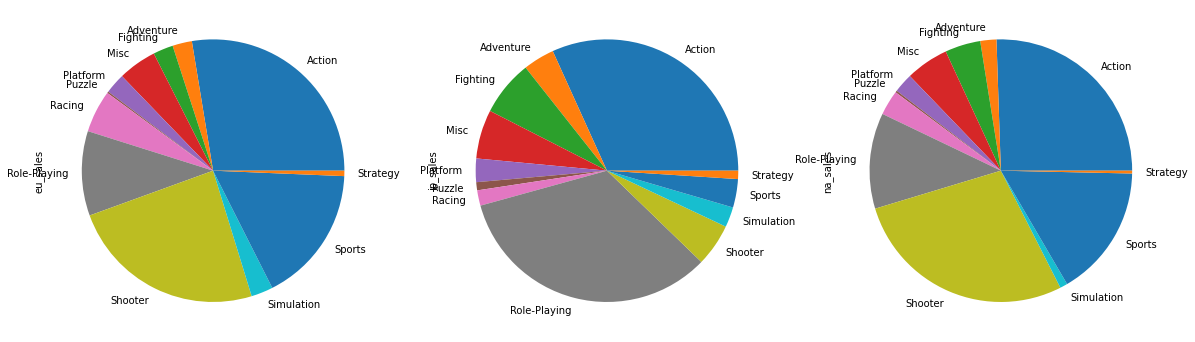

In [98]:
#распределение суммарных продаж по жанрам в каждом из регионов
(
    df.pivot_table(index = 'genre', values = ['eu_sales', 'na_sales', 'jp_sales'], aggfunc = 'sum').
        plot(kind = 'pie', subplots=True, figsize = (20,20), legend = None)
);


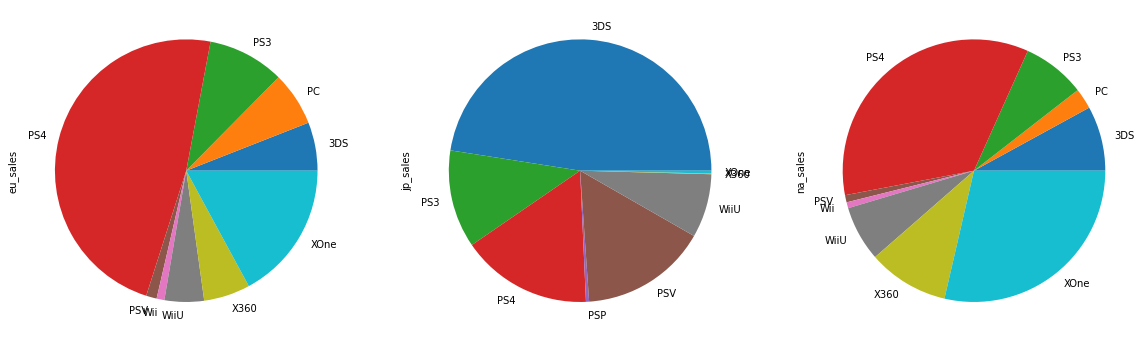

In [99]:
#распределение суммарных продаж по платформам в каждом из регионов
(
    df.pivot_table(index = 'platform', values = ['eu_sales', 'na_sales', 'jp_sales'], aggfunc = 'sum').
    plot(kind = 'pie', subplots=True, figsize = (20,10), legend = None)
);

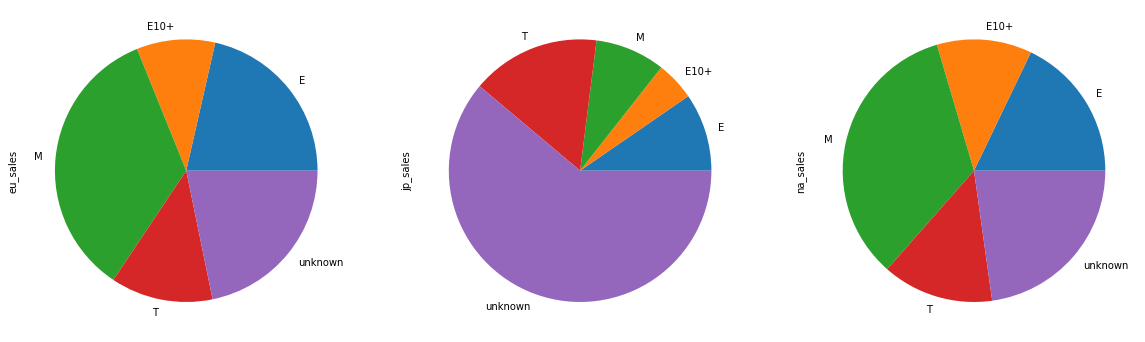

In [100]:
#распределение суммарных продаж по возрастному рейтингу ESRB в каждом из регионов
(
    df.pivot_table(index = 'rating', values = ['eu_sales', 'na_sales', 'jp_sales'], aggfunc = 'sum').
    plot(kind = 'pie', subplots=True, figsize = (20,10),  legend = None)
);

**Общий вывод:** 
- Европейцы и жители Северной Америки похожи по своим предпочтениям: лидирующие платформы в этих регионах PS4  и XOne, лидирующие жанры - Action, Shooter и Sport, а наиболее продаваемая категория по рейтингу ESRB - mature 17+ (M)
- Японцы же предпочитают игры, выпущенные преимущественно на платформе 3DS, в жанрах Role-Playing и Action c возрастным рейтингом Unknown , то есть большинство игр проданных в Японии не имеют рейтинга от америкаского рейтингового агентства.
- Рейтинг ESRB и продажи игр скорее не связаны. В Европе и Северной Америке наблюдаются самые высокие показатели продаж в категории Mature 17+. Однако в Америке на втором месте категория Everyone, а в Европе unknown и Everyone. В Японии вовсем большинство проданных игр имеют категорию Unknown. Соответственно, рейтинг ESRB применим скорее к Северной Америке и Европе, но не к Японии.

### Проверка гипотез о средних

#### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Пользовательский рейтинг платформы Xbox One = пользовательский рейтинг платформы PC
H_a: Пользовательский рейтинг платформы Xbox One ≠ пользовательский рейтинг платформы PC
alpha = 0.05
```
alpha = 0.05 - базовое значение, попробуем первично провести анализ с таким пороговым значением, и, в случае необходимости, изменим его

In [87]:
#проведем тест Левена на равенство дисперсий, Н0: дисперсии равны
st.levene(df.loc[(df['platform'] =='XOne')&(df['user_score']>0), 'user_score'],
          df.loc[(df['platform'] =='PC')&(df['user_score']>0), 'user_score'])

LeveneResult(statistic=6.004772988517075, pvalue=0.014868430917663678)

При alpha = 0,05 мы не можем принять нулевую гипотезу о том, что  дисперсии равны.

In [88]:
results = st.ttest_ind(df.loc[(df['platform'] =='XOne')&(df['user_score']>0), 'user_score'],
          df.loc[(df['platform'] =='PC')&(df['user_score']>0), 'user_score'],
                       equal_var = False)
alpha = .05

# вывод средних на экран 
print('Среднее значение оценки пользователей для платформы Xbox One :', 
      round(df[df['platform'] =='XOne']['user_score'].mean(), 2))
print('Среднее значение оценки пользователей для платформы PC :',
      round(df[df['platform'] =='PC']['user_score'].mean(), 2))

# вывод значения p-value на экран 
print('p-value:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue <alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Разницы в средних оценках пользователей нет.')

Среднее значение оценки пользователей для платформы Xbox One : 6.59
Среднее значение оценки пользователей для платформы PC : 6.3
p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу. Разницы в средних оценках пользователей нет.


#### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Пользовательский рейтинг жанра Action =  пользовательский рейтинг жанра Sports
H_1: Пользовательский рейтинг жанра Action > пользовательский рейтинг жанра Sports
alpha = 0.05
```

In [89]:
#проведем тест Левена на равенство дисперсий, Н0: дисперсии равны
st.levene(df.loc[(df['genre'] =='Sports')&(df['user_score']>0), 'user_score'],
          df.loc[(df['genre'] =='Action')&(df['user_score']>0), 'user_score'])

LeveneResult(statistic=21.607428421856284, pvalue=4.480161685830322e-06)

При alpha = 0,05 мы не можем принять нулевую гипотезу о равенстве дисперсий, далее будем считать, что дисперсии не равны

In [107]:
results = st.ttest_ind(df.loc[(df['genre'] =='Sports')&(df['user_score']>0), 'user_score'],
          df.loc[(df['genre'] =='Action')&(df['user_score']>0), 'user_score'],
                       equal_var = False)
alpha = .05

# вывод средних на экран 
print('Среднее значение оценки пользователей для жанра Sports :', 
      round(df[df['genre'] =='Sports']['user_score'].mean(), 2))
print('Среднее значение оценки пользователей для жанра Action :',
      round(df[df['genre'] =='Action']['user_score'].mean(), 2))

# вывод значения p-value на экран 
print('p-value:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue <alpha/2:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Разницы в средних оценках пользователей нет.')

Среднее значение оценки пользователей для жанра Sports : 5.23
Среднее значение оценки пользователей для жанра Action : 6.76
p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Средние пользовательские оценки игр в жанрае action выше, чем в жанре Sports

### Общий вывод

#### Закономерности, определяющие успешность игр:
- **Платформа, на которой вышла игра:** Наиболее продаваемые игры выпускаются на платформах-лидерах PS4, X360 и XOne. 
- **Рейтинг пользователей** скорее **не связан с продажами**, есть слабая положительная связь (r-Пирсона = 0.4) только для платформы WiiU. Для остальных платформ связь значительно слабее.
- **Рейтинг критиков** слабо положительно связан с продажами игр, выпущенных на платформах PS3, PS4, WiiU, X360,XOne.  Наибольшая связь рейтинга критиков и продаж наблюдается для платформы X360. Это линейная положительная связь (r-Пирсона = 0.53)
- **Жанр:** 
    - Самые прибыльные жанры - шутеры (средние продажи 1.3 млн. копий), платформенные игры (средние продажи 476 тыс. копий) и спортивные игры (редние продажи 680 тысю копий)
    - Наименее прибыльные жанры - Strategy (средние продажи 107 тыс. копий), Puzzle (редние продажи 157 тыс. копий) и Adventure (средние продажи 94 тыс. копий)
- **Регион, в котором находится целевая аудитория игр**: Европейцы и жители Северной Америки похожи по своим предпочтениям: лидирующие платформы в этих регионах PS4  и XOne, лидирующие жанры - Action, Shooter и Sport, а наиболее продаваемая категория по рейтингу ESRB - mature 17+ (M). Японцы же предпочитают игры, выпущенные преимущественно на платформе 3DS, в жанрах Role-Playing и Action c возрастным рейтингом Unknown , то есть большинство игр проданных в Японии не имеют возрастного рейтинга от америкаского рейтингового агентства.
- **Рейтинг ESRB** : Рейтинг ESRB и продажи игр по регионам скорее не связаны. В Европе и Северной Америке наблюдаются самые высокие показатели продаж в категории Mature 17+. В Америке на втором месте категория Everyone, а в Европе Everyone и игры без рейтинга. В Японии вовсем большинство проданных игр имеют категорию Unknown (без рейтинга). Соответственно, рейтинг ESRB применим скорее к Северной Америке и Европе, но не к Японии.

#### Полезные наблюдения, сделанные в ходе анализа:
- Средний жизненный цикл платформы, выпускающей игры - 6 лет, но на рынке есть лидеры по продолжительности существования - PC, DS.
- В некоторые годы новые платформы не появляются. Динамика появление новых платформ такова, что 2-3 года подряд появляются новые платформы, а затем идет спад на 2-3 года, когда новые платформы не возникают
- На 2016 год есть 9 платформ, которые продолжают выпускать игры. 
- По количеству проданных копий лидирует PS4, на втором месте XOne и WiiU, но продажи на этих трех платформах последние три года снижаются.
- С 2015 года рост наблюдается у платформы 3DS
- PSV платформа имеет наиболее низкое количество проданных копий, которое не менялось с 2015
- Платформа, на которой выпущена игра: потенциально успешные платформы - PS4, XOne и WiiU, поскольку эти платформы сейчас на пике популярности и уже имеют большую аудиторию.При этом, 3DS кажется наибольее потенциально прибыльной, поскольку тренд на возрастание ее популярности только начался
- У PS4 и XOne наибольший потенциал в плане продаж, поскольку ящики с усами вытянутые и максимальные значения продаж самые высокие среди платформ.
- Большинство платформ продают менее 1 миллиона копий игр, продажи на платформах PS4, WiiU, X360 и XOne обычно преодолевают цифру в  в 1 миллион проданных копий
- Средние пользовательские оценки платформ Xbox One и PC одинаковые
- Средние пользовательские оценки игр в жанрае Action выше, чем в жанре Sports
